In [4]:
#Loading libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import zipfile
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [8]:
train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [9]:
test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [10]:
print(train.shape, test.shape)

(39774, 3) (9944, 2)


In [18]:
def preprocess(ingredients):
    #Converting to lowercase
    ingredients = [[x.lower() for x in y] for y in ingredients]

    #Removing extra white spaces
    ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

    #Removing numbers
    ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]
    #Removing punctuation and special characters
    ingredients = [[x.replace("-", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("&", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("'", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("''", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("%", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("!", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("(", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace(")", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace(",", " ") for x in y] for y in ingredients] 
    ingredients = [[x.replace(".", " ") for x in y] for y in ingredients] 
    ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]
    
    return ingredients

In [19]:
train["ingredients"] = preprocess(train["ingredients"])
test["ingredients"] = preprocess(test["ingredients"])
train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[kraft zesty italian dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [24]:
train['ingredients'] = [','.join(map(str, l)) for l in train['ingredients']]
test['ingredients'] = [','.join(map(str, l)) for l in test['ingredients']]
train

KeyboardInterrupt: 

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...


True

In [16]:
#詞還原
train['ingredients'] = [' '.join([WordNetLemmatizer().lemmatize(line) for line in lists]).strip() for lists in train['ingredients']]       
test['ingredients'] = [' '.join([WordNetLemmatizer().lemmatize(line) for line in lists]).strip() for lists in test['ingredients']]
train

,id,cuisine,ingredients
0,10259,greek,r o m a i n e l e t t u c e b l a c k o ...
1,25693,southern_us,p l a i n f l o u r g r o u n d p e p p ...
2,20130,filipino,e g g p e p p e r s a l t m a y o n a i ...
3,22213,indian,w a t e r v e g e t a b l e o i l w h e ...
4,13162,indian,b l a c k p e p p e r s h a l l o t c o ...
...,...,...,...
39769,29109,irish,l i g h t b r o w n s u g a r g r a n u ...
39770,11462,italian,k r a f t z e s t y i t a l i a n d r e ...
39771,2238,irish,e g g c i t r u s f r u i t r a i s i n ...
39772,41882,chinese,b o n e l e s s c h i c k e n s k i n l e ...


In [8]:
print(type(train['ingredients'][0]))
print(test['ingredients'][0])

<class 'list'>
['baking powder', 'eggs', 'all-purpose flour', 'raisins', 'milk', 'white sugar']


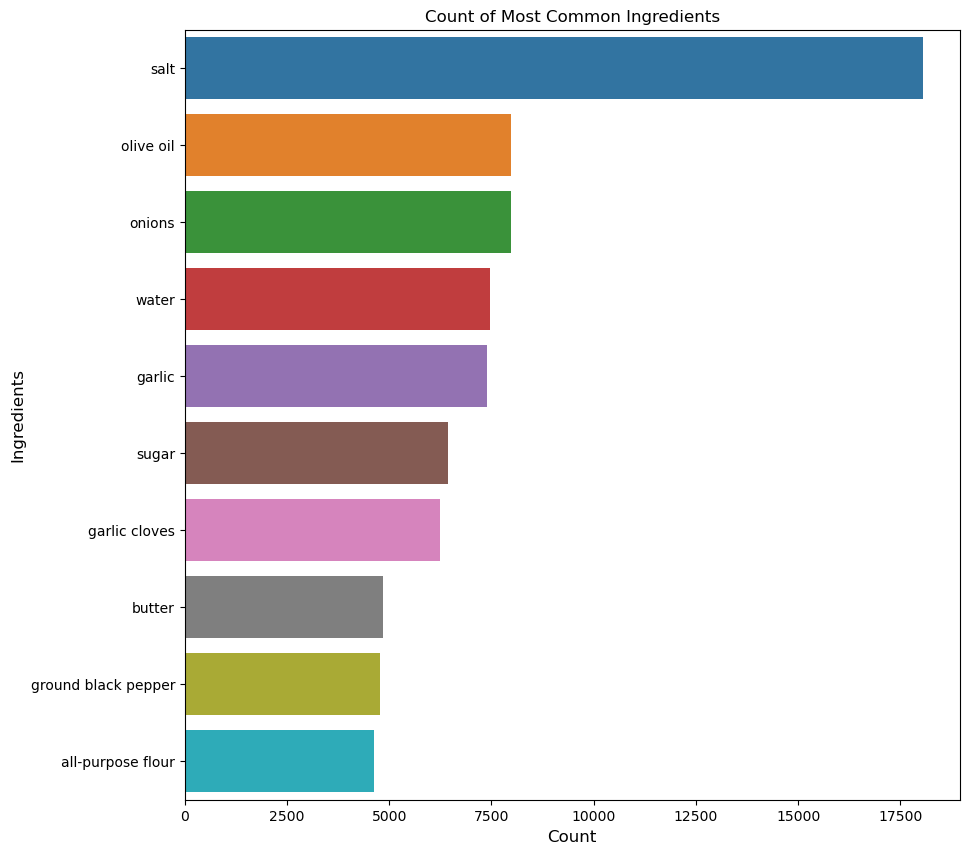

In [5]:
#Finding count of most common ingredients in train dataframe
count_ingredients = []
for x in train['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(10,10))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Count of Most Common Ingredients')
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()